## Gradient Boosting

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [2]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [3]:
# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier()

# Train the model
clf.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

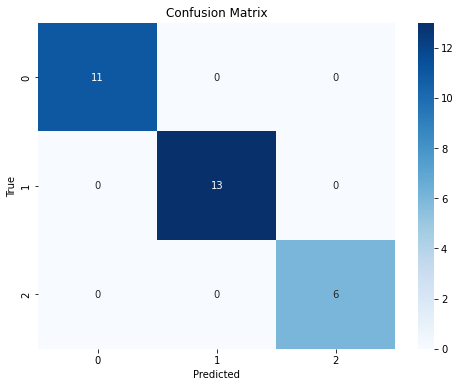

In [4]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", clf.score(X_test, y_test))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, cmap="Blues", fmt="d", ax=ax
)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Feature Importance')

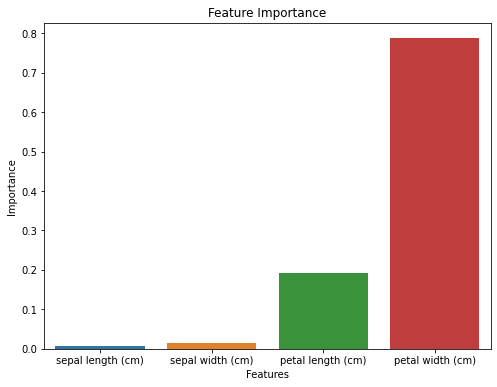

In [5]:
# Display the feature importances
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=data.feature_names, y=clf.feature_importances_, ax=ax)
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance')

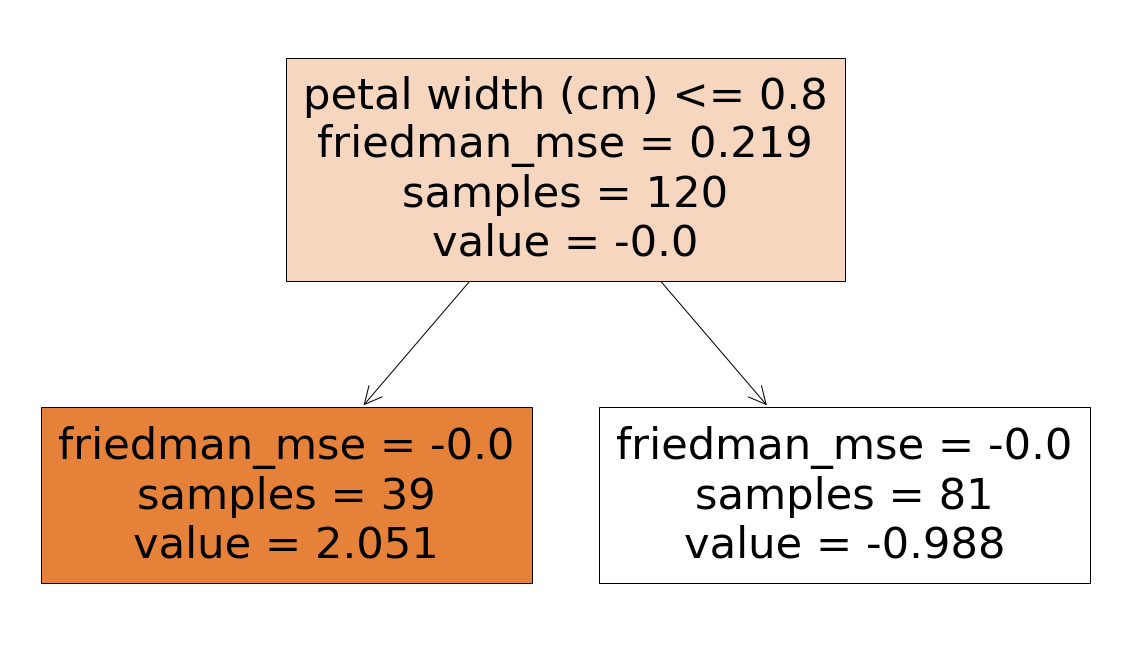

In [13]:
# Get the tree estimators from the fitted classifier
tree_estimators = clf.estimators_[0, :]

# Determine the tree with the largest weight based on the rank
rank = 2
tree_index = np.argsort(
    [tree.tree_.max_depth for tree in tree_estimators]
)[-rank - 1]


# Plot the selected tree
fig, ax = plt.subplots(figsize=(20, 12))
_ = plot_tree(
    tree_estimators[tree_index],
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True
)

In [18]:
from sklearn import datasets
iris = datasets.load_iris()

In [19]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [20]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
x = iris_df.drop('target', axis=0)
# help(iris_df.drop)

KeyError: "['target'] not found in axis"

In [23]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
